### 0.- Importacion de Librerias y de datos (y su guardado)

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [56]:
datos = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
datos.to_csv("/workspaces/Tutorial-K-Medias/data/raw.housing.csv")
datos.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 1.- Trabajar el archivo y Limpieza 

In [57]:
Columnas = datos.shape[1]
Filas = datos.shape[0]
print(f"El dataframe contiene {Columnas} Columnas y {Filas} Filas\n")

datos.info()

El dataframe contiene 9 Columnas y 20640 Filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


En este caso solo nos interesan las columnas Latitude, Longitude y MedInc

In [58]:
housing = datos[['Latitude', 'Longitude', 'MedInc']]
housing.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


Dividimos en train y test

In [59]:
X_train, X_test = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (16512, 3)
Tamaño del conjunto de prueba: (4128, 3)


### Paso 2: Construcción de K-Means

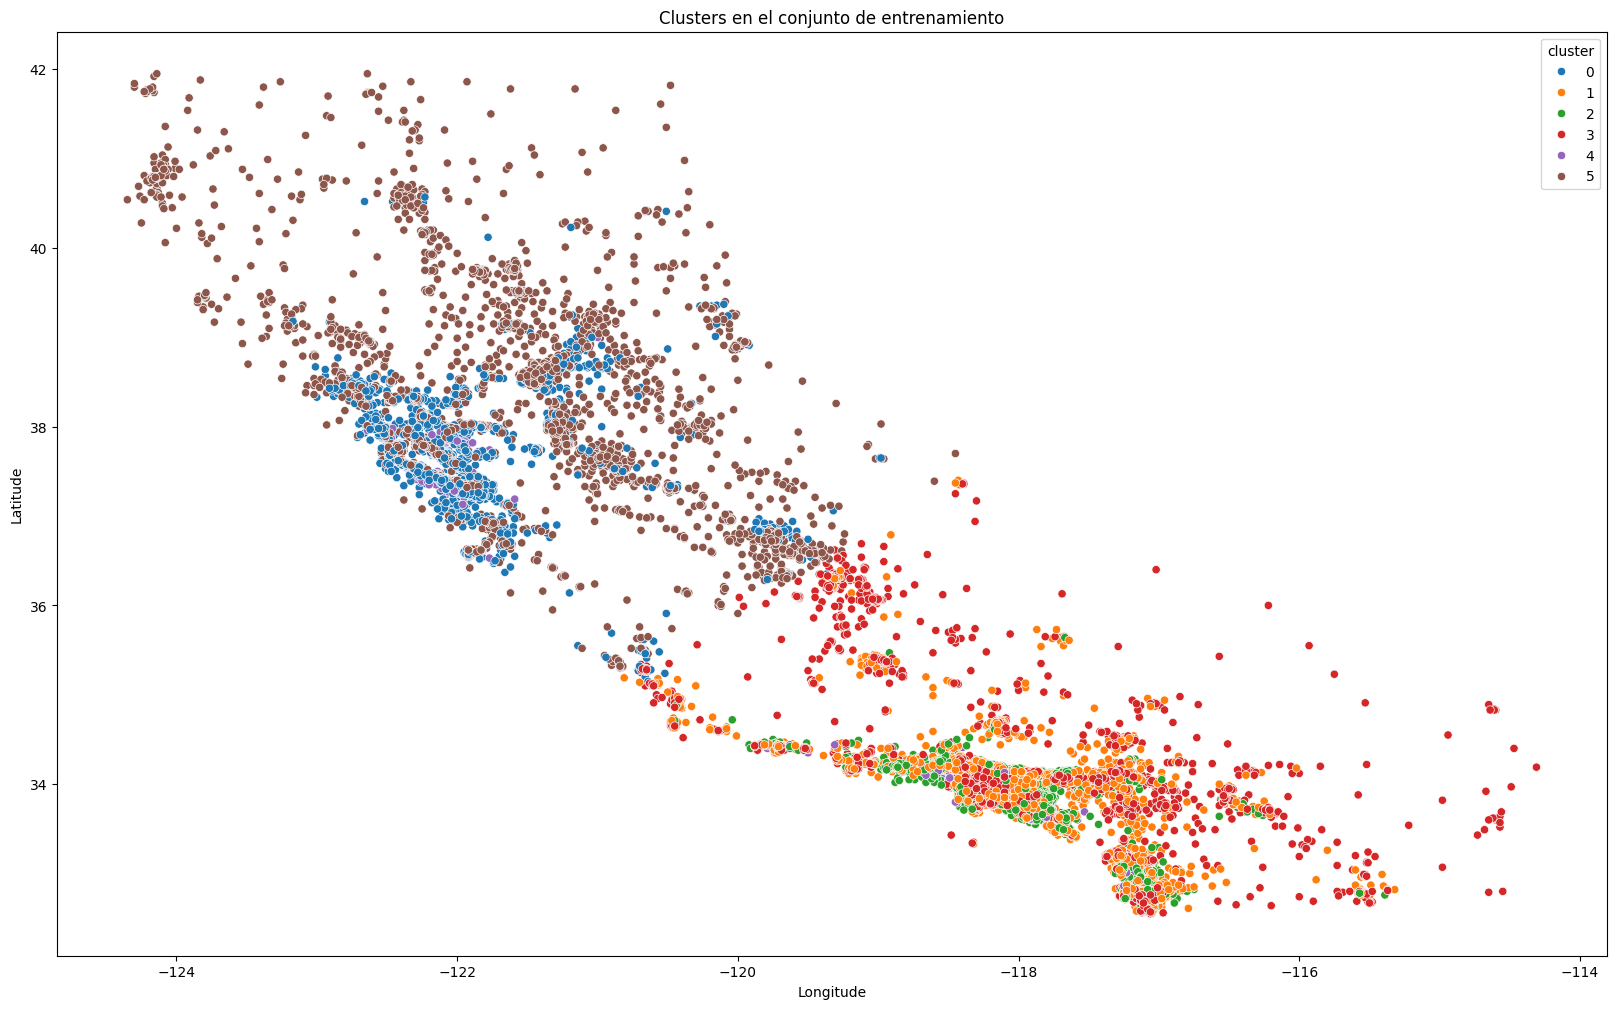

In [60]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train[['Latitude', 'Longitude', 'MedInc']])
X_train['cluster'] = kmeans.labels_
plt.figure(figsize=(20, 12))
sns.scatterplot(data=X_train, x='Longitude', y='Latitude', hue='cluster', palette='tab10')
plt.title('Clusters en el conjunto de entrenamiento')
plt.show()

Podemos observar cómo las casas se agrupan en 6 regiones distintas según su localización y el ingreso medio.

Aunque algunos clusters se solapan, en general hay separación geográfica clara.

##### Predecimos los clusters del test y visualizamos

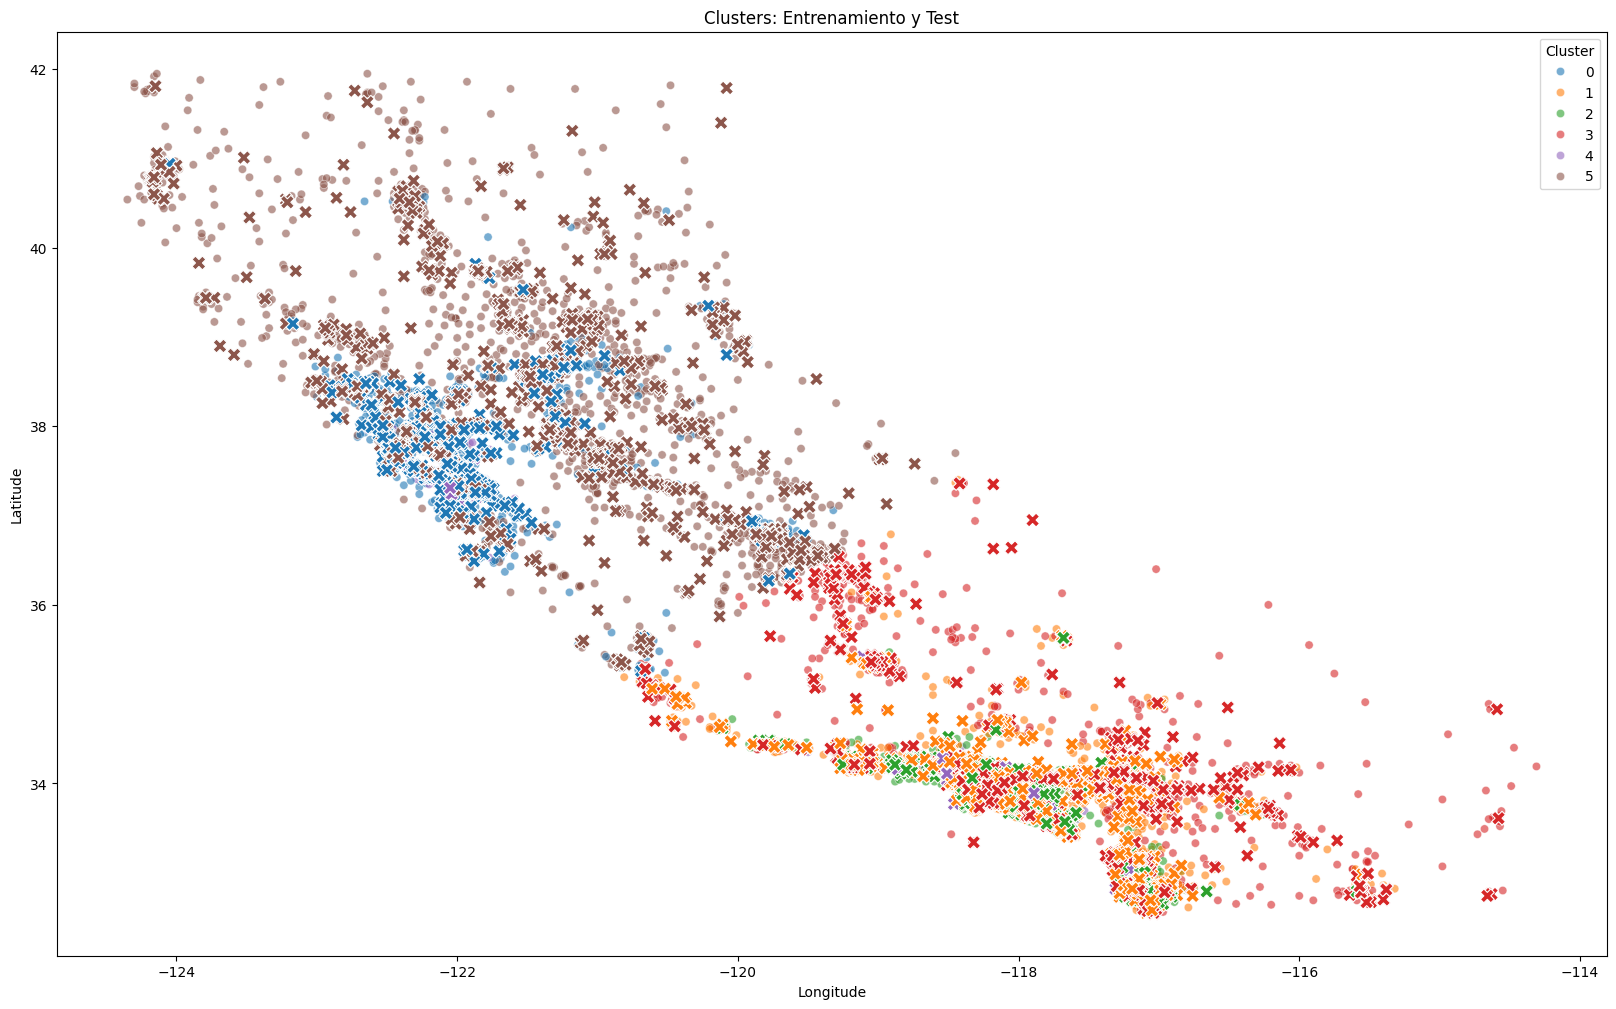

In [61]:
test_clusters = kmeans.predict(X_test[['Latitude', 'Longitude', 'MedInc']])
X_test['cluster'] = test_clusters
plt.figure(figsize=(20, 12))

sns.scatterplot(data=X_train, x='Longitude', y='Latitude', hue='cluster', palette='tab10', alpha=0.6, marker='o')
sns.scatterplot(data=X_test, x='Longitude', y='Latitude', hue='cluster', palette='tab10', marker='X', s=100, legend=False)

plt.title('Clusters: Entrenamiento y Test')
plt.legend(title='Cluster')
plt.show()

Las casas de test parecen caer razonablemente dentro de las regiones previamente formadas.

El modelo parece generalizar bien en el espacio geográfico.

### 3.- Random forest (modelo de clasificación supervisada)

In [62]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train[['Latitude', 'Longitude', 'MedInc']], X_train['cluster'])

y_pred = clf.predict(X_test[['Latitude', 'Longitude', 'MedInc']])

# Evaluasion
print("Clasificación en el conjunto de test:")
print(classification_report(X_test['cluster'], y_pred))
print("Matriz de confusión:")
print(confusion_matrix(X_test['cluster'], y_pred))

Clasificación en el conjunto de test:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128

Matriz de confusión:
[[ 558    1    0    0    0    2]
 [   0  982    0    1    0    0]
 [   0    0  298    0    1    0]
 [   0    2    0 1107    0    2]
 [   0    0    2    0   60    0]
 [   3    2    0    2    0 1105]]


#### Guardamos el modelo 

In [63]:
joblib.dump(kmeans, '/workspaces/Tutorial-K-Medias/models/kmeans_model.pkl')
joblib.dump(clf, '/workspaces/Tutorial-K-Medias/models/random_forest_model.pkl')

print("Modelos guardados correctamente.")

Modelos guardados correctamente.
